# Optuna 사용법

- Optuna 설치
- Optuna 기본 사용법
- Sklearn, PyTorch, PyTorch Lightning 에서의 사용
    - 튜닝 알고리즘
- 내장 시각화 툴 이용하기
- Wandb 연동
---

### References
- https://optuna.readthedocs.io/
- https://towardsdatascience.com/why-is-everyone-at-kaggle-obsessed-with-optuna-for-hyperparameter-tuning-7608fdca337c
- https://medium.com/pytorch/using-optuna-to-optimize-pytorch-hyperparameters-990607385e36
---
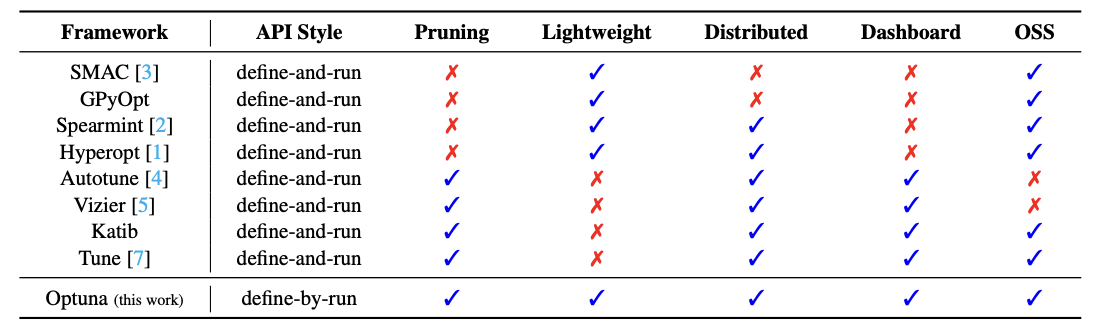


## Optuna 설치

In [1]:
# !pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=f818f72b9b625e7d54051ad1376db07c81c786da284ec139b9f4469dd346e036
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [2]:
import matplotlib.pyplot as plt

## Optuna 기본 사용법

In [3]:
import optuna

def objective(trial):
    x = trial.suggest_float("x", -10, 10)
    return (x - 2) ** 2

- Optuna 컨벤션 - Optimize 할 함수를 objective 라고 네이밍
- suggest APIs 
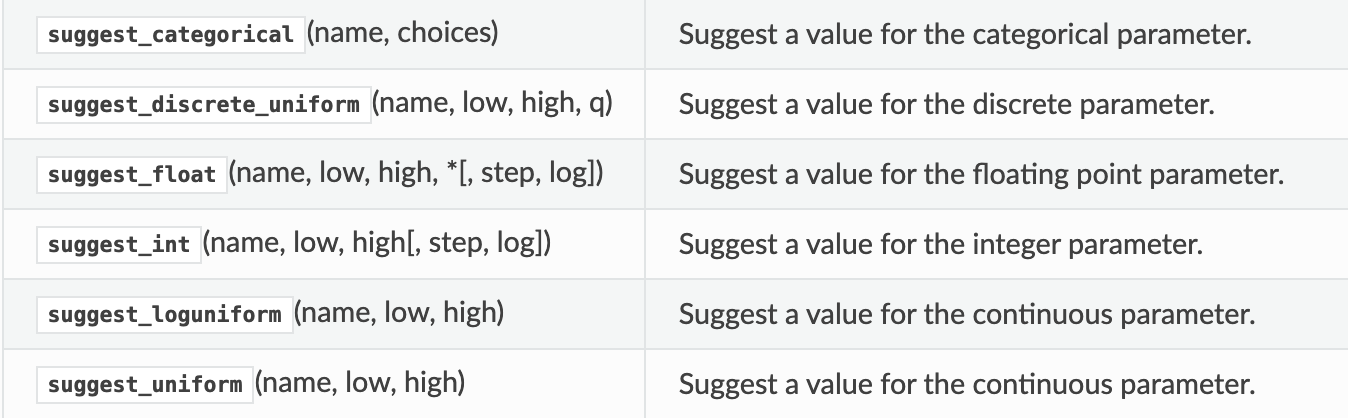

In [4]:
study = optuna.create_study()
study.optimize(objective, n_trials=150)

[I 2022-02-08 16:53:49,760] A new study created in memory with name: no-name-ea6ef775-3502-4870-8ad6-096272d50d1a
[I 2022-02-08 16:53:49,765] Trial 0 finished with value: 39.918199957379336 and parameters: {'x': 8.31808514958285}. Best is trial 0 with value: 39.918199957379336.
[I 2022-02-08 16:53:49,767] Trial 1 finished with value: 23.306628477073428 and parameters: {'x': -2.827693908800912}. Best is trial 1 with value: 23.306628477073428.
[I 2022-02-08 16:53:49,769] Trial 2 finished with value: 16.193409399841318 and parameters: {'x': -2.0241035523258244}. Best is trial 2 with value: 16.193409399841318.
[I 2022-02-08 16:53:49,776] Trial 3 finished with value: 75.39617876201423 and parameters: {'x': -6.6830973023463365}. Best is trial 2 with value: 16.193409399841318.
[I 2022-02-08 16:53:49,780] Trial 4 finished with value: 62.410984729831455 and parameters: {'x': 9.900062324427033}. Best is trial 2 with value: 16.193409399841318.
[I 2022-02-08 16:53:49,782] Trial 5 finished with val

- Study: Optimization 세션 - set of trials

In [5]:
print("Best parameters: ", study.best_params)
print("Best metric observed:", study.best_value)

Best parameters:  {'x': 1.9987200450198226}
Best metric observed: 1.6382847512809573e-06


## SKLearn 에서의 사용

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train shape: (430, 13), X_valid shape: (76, 13)
y_train shape: (430,), y_valid shape: (76,)


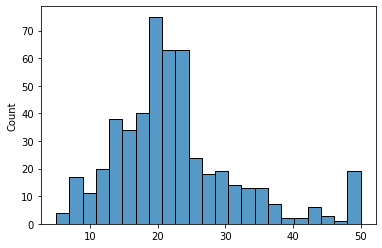

In [7]:
data = load_boston()
X = data.data
y = data.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"X_train shape: {X_train.shape}, X_valid shape: {X_valid.shape}")
print(f"y_train shape: {y_train.shape}, y_valid shape: {y_valid.shape}")

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y)
plt.show()

In [8]:
def objective(trial: optuna.Trial, X_train, X_valid, y_train, y_valid):
    # 딕셔너리 형태로 파라미터 별 서치스페이스 인풋으로 사용
    params = {
        "n_estimators": trial.suggest_int(name="n_estimators", low=100, high=2000),
        "max_depth": trial.suggest_float("max_depth", 3, 8),
        "max_features": trial.suggest_categorical(
            "max_features", choices=["auto", "sqrt", "log2"]
        ),
        "n_jobs": -1,
        "random_state": 42,
    }
    # keyword argument 로 넘겨줌 // 하나씩 넘기기도 가능
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    return mse

study = optuna.create_study(direction="minimize",)
# trial 외 다른 인자들 값 지정을 위한 lambda function
func = lambda trial: objective(trial, X_train=X_train,  X_valid=X_valid, y_train=y_train, y_valid=y_valid)
study.optimize(func, n_trials=50)

[I 2022-02-08 16:55:22,665] A new study created in memory with name: no-name-5c8afbf5-d569-4f1b-97d3-b37902d1673d
[I 2022-02-08 16:55:24,659] Trial 0 finished with value: 8.612104009590583 and parameters: {'n_estimators': 1296, 'max_depth': 5.630172982156342, 'max_features': 'auto'}. Best is trial 0 with value: 8.612104009590583.
[I 2022-02-08 16:55:25,652] Trial 1 finished with value: 8.151535874092634 and parameters: {'n_estimators': 660, 'max_depth': 4.139042864827169, 'max_features': 'log2'}. Best is trial 1 with value: 8.151535874092634.
[I 2022-02-08 16:55:26,838] Trial 2 finished with value: 5.128551784332203 and parameters: {'n_estimators': 798, 'max_depth': 7.326304542059961, 'max_features': 'sqrt'}. Best is trial 2 with value: 5.128551784332203.
[I 2022-02-08 16:55:28,927] Trial 3 finished with value: 8.140291103547284 and parameters: {'n_estimators': 1358, 'max_depth': 6.2131336805254795, 'max_features': 'auto'}. Best is trial 2 with value: 5.128551784332203.
[I 2022-02-08 1

In [9]:
print("Best parameters: ", study.best_params)
print("Best metric observed:", study.best_value)

Best parameters:  {'n_estimators': 453, 'max_depth': 7.2661054337064055, 'max_features': 'log2'}
Best metric observed: 5.018134022923019


<AxesSubplot:>

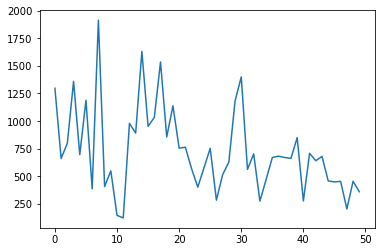

In [10]:
study.trials_dataframe().params_n_estimators.plot()

### 튜닝 알고리즘
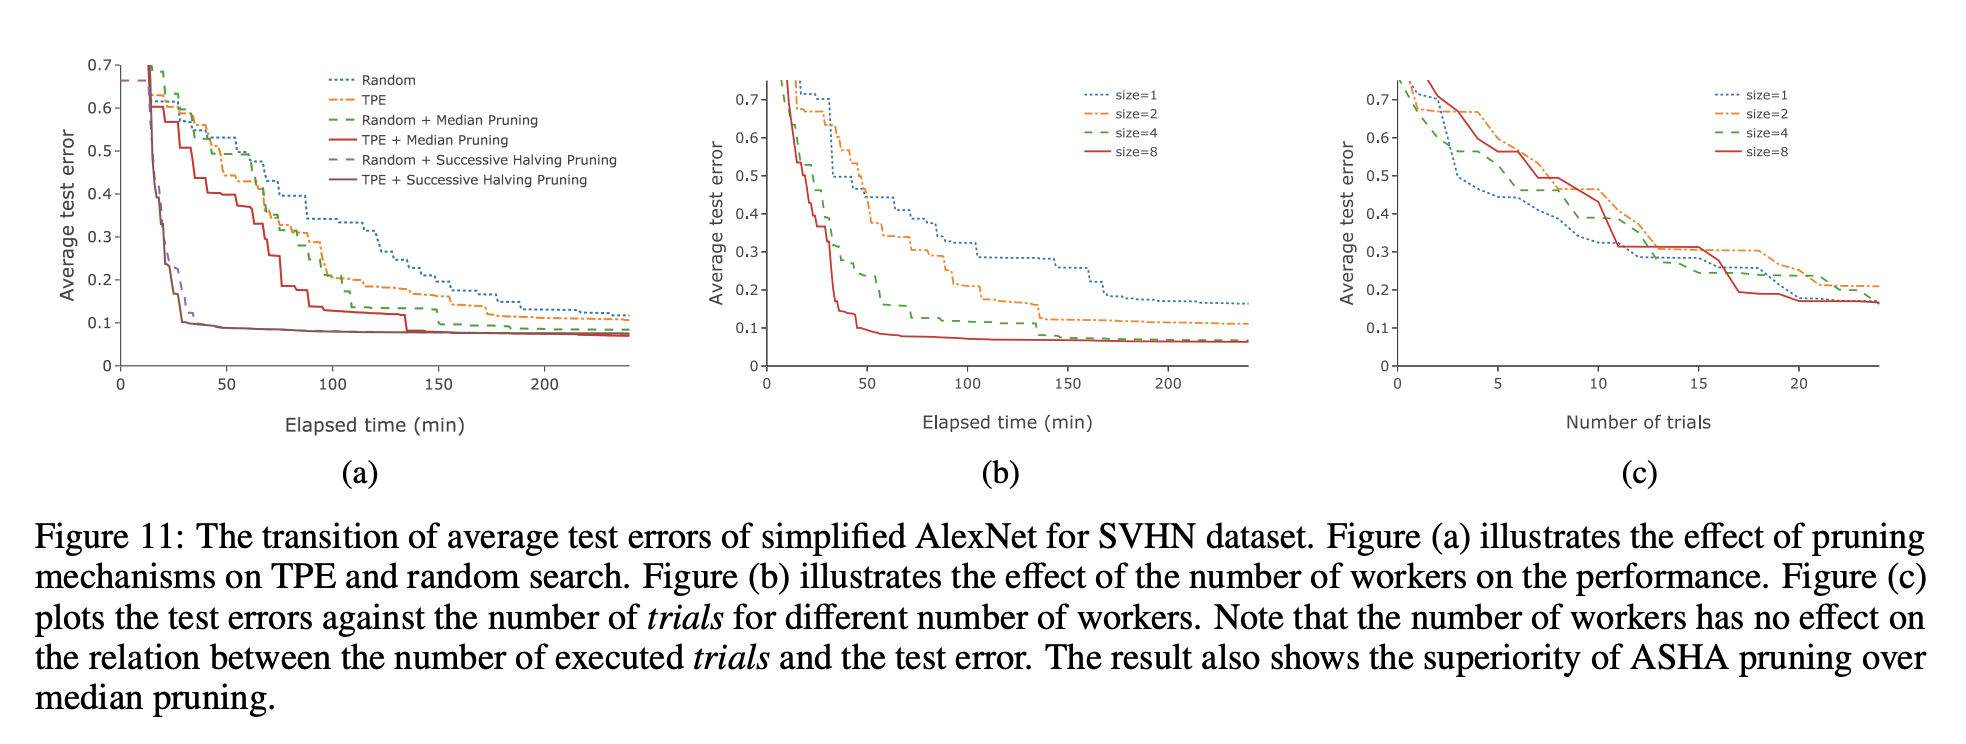

1. Tree-structured Parzen Estimator algorithm implemented in **optuna.samplers.TPESampler**

2. CMA-ES based algorithm implemented in **optuna.samplers.CmaEsSampler**

3. Grid Search implemented in **optuna.samplers.GridSampler**

4. Random Search implemented in **optuna.samplers.RandomSampler**

### CMA-ES 알고리즘
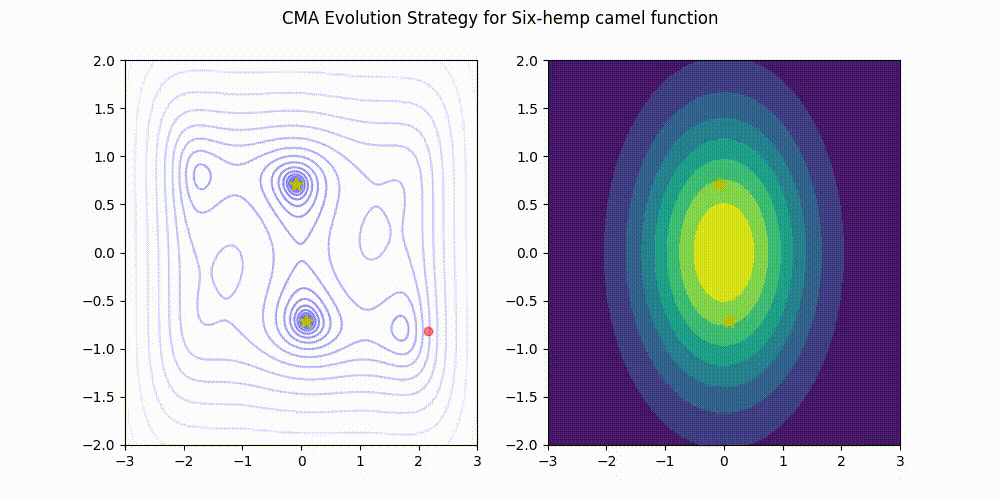
- https://medium.com/optuna/introduction-to-cma-es-sampler-ee68194c8f88
- https://github.com/CyberAgentAILab/cmaes
- https://arxiv.org/abs/2012.06932

### Random vs TPE sampler suggest 값 비교

In [11]:
def objective(trial):
    x = trial.suggest_float("x", -10, 10)
    y = trial.suggest_float("y", -10, 10)
    return x**2 + y**2

[I 2022-02-08 17:00:38,086] A new study created in memory with name: no-name-de3ab66b-5a8f-432f-94fc-81c75e35082a
[I 2022-02-08 17:00:38,089] Trial 0 finished with value: 15.073283789543375 and parameters: {'x': 2.7360937389895152, 'y': 2.754464528906798}. Best is trial 0 with value: 15.073283789543375.
[I 2022-02-08 17:00:38,092] Trial 1 finished with value: 70.896270337512 and parameters: {'x': 5.9215953179520575, 'y': -5.9858983643159425}. Best is trial 0 with value: 15.073283789543375.
[I 2022-02-08 17:00:38,094] Trial 2 finished with value: 65.13094773891132 and parameters: {'x': -7.345525558948021, 'y': 3.3427835708811138}. Best is trial 0 with value: 15.073283789543375.
[I 2022-02-08 17:00:38,096] Trial 3 finished with value: 25.46901956174223 and parameters: {'x': 0.15690455665499314, 'y': 5.04424429640785}. Best is trial 0 with value: 15.073283789543375.
[I 2022-02-08 17:00:38,097] Trial 4 finished with value: 7.7580609084232 and parameters: {'x': 2.199250914392527, 'y': -1.70

<AxesSubplot:>

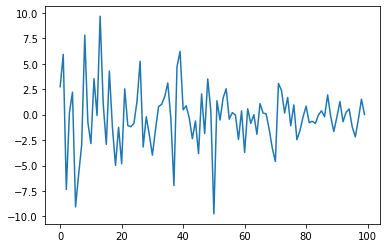

In [12]:
study = optuna.create_study(sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100, )
study.trials_dataframe().params_x.plot()

[I 2022-02-08 17:00:56,519] A new study created in memory with name: no-name-f78e5d85-faf8-4d8c-b2ff-620991e6edfb
[I 2022-02-08 17:00:56,523] Trial 0 finished with value: 17.143523135549962 and parameters: {'x': 1.990620875872473, 'y': -3.630558037559883}. Best is trial 0 with value: 17.143523135549962.
[I 2022-02-08 17:00:56,525] Trial 1 finished with value: 104.14559472609544 and parameters: {'x': 3.1508923639495823, 'y': -9.706568499572835}. Best is trial 0 with value: 17.143523135549962.
[I 2022-02-08 17:00:56,527] Trial 2 finished with value: 32.117829778973544 and parameters: {'x': 0.5486212798843724, 'y': 5.640642203706204}. Best is trial 0 with value: 17.143523135549962.
[I 2022-02-08 17:00:56,529] Trial 3 finished with value: 65.94998347568838 and parameters: {'x': 4.8334409986785065, 'y': 6.525935303692652}. Best is trial 0 with value: 17.143523135549962.
[I 2022-02-08 17:00:56,531] Trial 4 finished with value: 36.05382300021732 and parameters: {'x': -4.792798974168595, 'y': 

<AxesSubplot:>

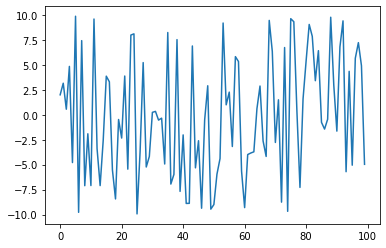

In [13]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=100, )
study.trials_dataframe().params_x.plot()

### (SKLearn) CMA-ES 적용

In [14]:
def objective(trial: optuna.Trial, X_train, X_valid, y_train, y_valid):
    # 딕셔너리 형태로 파라미터 별 서치스페이스 인풋으로 사용
    params = {
        "n_estimators": trial.suggest_int(name="n_estimators", low=100, high=2000),
        "max_depth": trial.suggest_float("max_depth", 3, 8),
        "max_features": trial.suggest_categorical(
            "max_features", choices=["auto", "sqrt", "log2"]
        ),
        "n_jobs": -1,
        "random_state": 42,
    }
    # keyword argument 로 넘겨줌 // 하나씩 넘기기도 가능
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    return mse
    
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.CmaEsSampler(warn_independent_sampling=False)) # sampler 지정, CMA-ES 샘플러 사용시 categorical suggest는 random sampler 방식 이용
func = lambda trial: objective(trial, X_train=X_train,  X_valid=X_valid, y_train=y_train, y_valid=y_valid)
study.optimize(func, n_trials=30,)

[I 2022-02-08 17:02:13,879] A new study created in memory with name: no-name-3734a741-405c-4e7e-869f-4e8880f8ce4d
[I 2022-02-08 17:02:15,077] Trial 0 finished with value: 8.692577154732247 and parameters: {'n_estimators': 812, 'max_depth': 5.746654424555701, 'max_features': 'auto'}. Best is trial 0 with value: 8.692577154732247.
[I 2022-02-08 17:02:16,583] Trial 1 finished with value: 8.632831704528089 and parameters: {'n_estimators': 1050, 'max_depth': 5.700412208335375, 'max_features': 'auto'}. Best is trial 1 with value: 8.632831704528089.
[I 2022-02-08 17:02:18,036] Trial 2 finished with value: 8.1727529574172 and parameters: {'n_estimators': 1050, 'max_depth': 4.440874918004686, 'max_features': 'log2'}. Best is trial 2 with value: 8.1727529574172.
[I 2022-02-08 17:02:19,429] Trial 3 finished with value: 6.550273213588195 and parameters: {'n_estimators': 1050, 'max_depth': 5.600090503426537, 'max_features': 'log2'}. Best is trial 3 with value: 6.550273213588195.
[I 2022-02-08 17:02

In [15]:
print("Best parameters: ", study.best_params)
print("Best metric observed:", study.best_value)

Best parameters:  {'n_estimators': 1049, 'max_depth': 7.926394486750415, 'max_features': 'sqrt'}
Best metric observed: 5.1227727892324335


<AxesSubplot:>

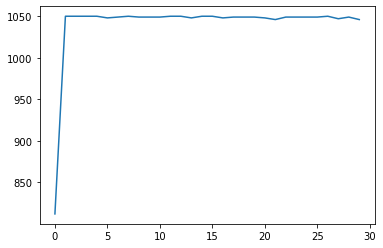

In [16]:
study.trials_dataframe().params_n_estimators.plot()

## PyTorch 에서의 사용

- 간단한 FashinMNIST 예제

In [17]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets
from torchvision import transforms
from sklearn.metrics import accuracy_score

# 시드 고정
def seed_everything(seed=99):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  
seed_everything()

In [18]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CLASSES = 10
EPOCHS = 10
LOG_INTERVAL = 10

print(DEVICE)

def get_mnist(BATCHSIZE):
    # Load FashionMNIST dataset.
    # Optimize batch size
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('./mnist_data', train=True, download=True, transform=transforms.ToTensor()),
        batch_size=BATCHSIZE,
        shuffle=True,
    )
    valid_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('./mnist_data', train=False, transform=transforms.ToTensor()),
        batch_size=32,
        shuffle=True,
    )

    return train_loader, valid_loader

cpu


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./mnist_data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./mnist_data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./mnist_data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./mnist_data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./mnist_data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist_data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./mnist_data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist_data\FashionMNIST\raw



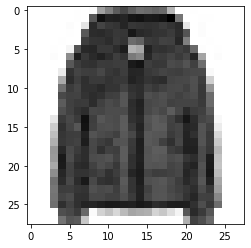

(28, 28)


In [20]:
# Show sample

import matplotlib.pyplot as plt

sample_tr_loader, sample_vl_loader = get_mnist(1)
sample, _ = next(iter(sample_tr_loader))
sample = sample.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(sample, cmap='Greys')
plt.show()
print(sample.shape)

In [21]:
class Network(nn.Module):
    def __init__(self, trial):
        super(Network, self).__init__()

        n_layers = trial.suggest_int("n_layers", 1, 3)
        layers = []

        in_features = 28 * 28
        for i in range(n_layers):
            out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
            layers.append(nn.Linear(in_features, out_features))
            layers.append(nn.ReLU())
            
            p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
            layers.append(nn.Dropout(p))

            in_features = out_features
        layers.append(nn.Linear(in_features, CLASSES))
        layers.append(nn.LogSoftmax(dim=1))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

###Pruning 적용

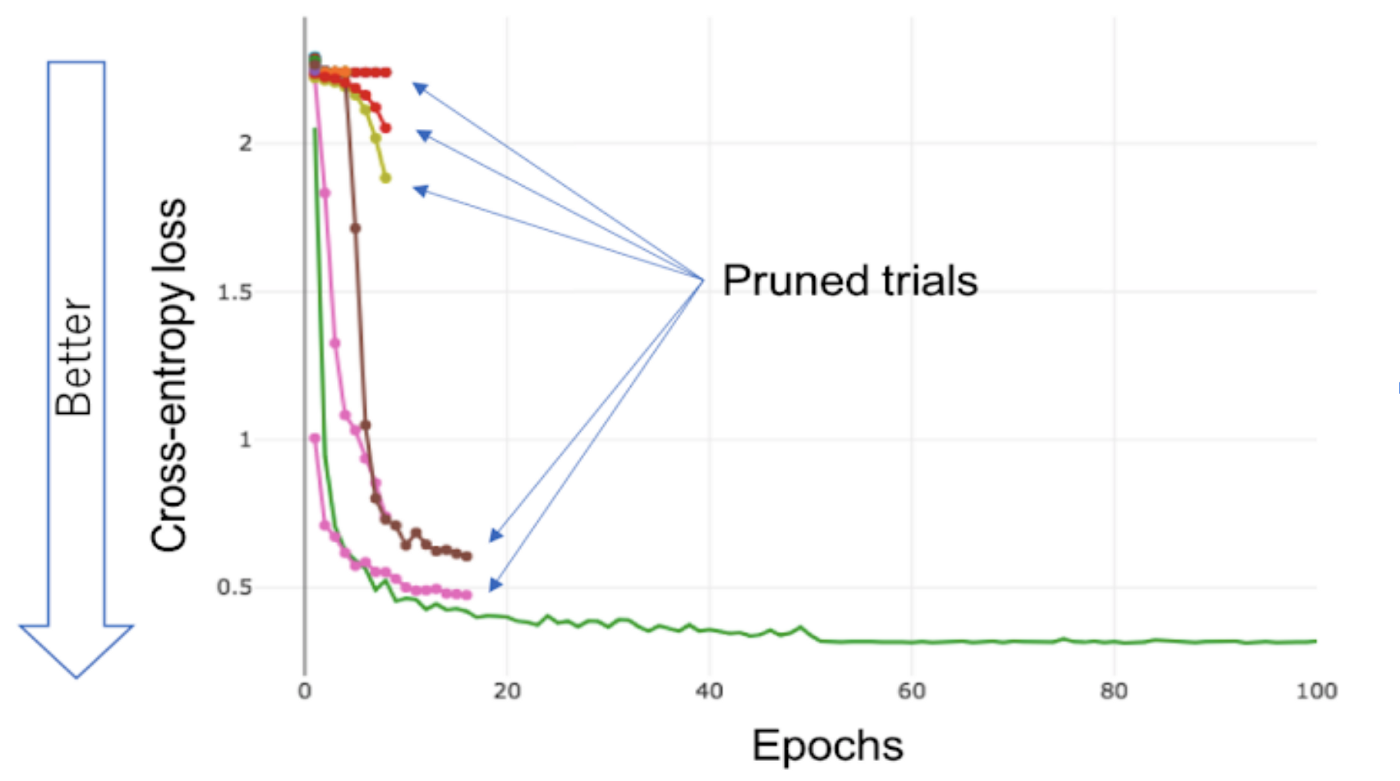

- Early stopping 과 같이 동작

- Optuna 제공 pruning 알고리즘
    - Asynchronous Successive Halving algorithm implemented in **optuna.pruners.SuccessiveHalvingPruner**

    - Hyperband algorithm implemented in **optuna.pruners.HyperbandPruner**

    - Median pruning algorithm implemented in **optuna.pruners.MedianPruner**

    - Threshold pruning algorithm implemented in **optuna.pruners.ThresholdPruner**

- Pruning 을 사용하기 위해선, report() 와 should_prune() 을 매스텝 call 해줘야함.

In [22]:
def objective(trial):

    # Generate the model.
    model = Network(trial)
    model.to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Set trial batch size
    BATCHSIZE = trial.suggest_int("batch_size", 4, 128)
    N_TRAIN_EXAMPLES = BATCHSIZE * 30
    N_VALID_EXAMPLES = BATCHSIZE * 10

    # Get the FashionMNIST dataset.
    train_loader, valid_loader = get_mnist(BATCHSIZE)

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        total_preds = []
        total_targets = []
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                total_preds.extend(pred.cpu().numpy().reshape(-1))
                total_targets.extend(target.cpu().numpy().reshape(-1))

        accuracy = accuracy_score(total_targets, total_preds)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [23]:
study = optuna.create_study(direction="maximize", 
                            sampler=optuna.samplers.TPESampler(), # if not set, TPESampler (single-objective optimization) / NSGAIISampler (multi-objective optimization) as default
                            pruner=optuna.pruners.SuccessiveHalvingPruner() # if not set, MedianPruner as default
                            )
study.optimize(objective, n_trials=50, timeout=600)

[I 2022-02-08 17:07:43,740] A new study created in memory with name: no-name-82f9711a-7816-4f32-b6f3-4a46bf010326
[I 2022-02-08 17:07:48,924] Trial 0 finished with value: 0.725 and parameters: {'n_layers': 1, 'n_units_l0': 73, 'dropout_l0': 0.40035500009525826, 'optimizer': 'SGD', 'lr': 0.08123389584415752, 'batch_size': 91}. Best is trial 0 with value: 0.725.
[I 2022-02-08 17:07:51,387] Trial 1 finished with value: 0.75 and parameters: {'n_layers': 2, 'n_units_l0': 122, 'dropout_l0': 0.21575390567475466, 'n_units_l1': 122, 'dropout_l1': 0.34949384080527285, 'optimizer': 'RMSprop', 'lr': 0.0007594414759363685, 'batch_size': 23}. Best is trial 1 with value: 0.75.
[I 2022-02-08 17:07:52,322] Trial 2 pruned. 
[I 2022-02-08 17:07:53,240] Trial 3 pruned. 
[I 2022-02-08 17:07:53,565] Trial 4 pruned. 
[I 2022-02-08 17:07:54,781] Trial 5 pruned. 
[I 2022-02-08 17:07:55,945] Trial 6 pruned. 
[I 2022-02-08 17:07:57,038] Trial 7 pruned. 
[I 2022-02-08 17:07:57,492] Trial 8 pruned. 
[I 2022-02-08 

In [24]:
print("Best parameters: ", study.best_params)
print("Best metric observed:", study.best_value)

Best parameters:  {'n_layers': 2, 'n_units_l0': 122, 'dropout_l0': 0.21575390567475466, 'n_units_l1': 122, 'dropout_l1': 0.34949384080527285, 'optimizer': 'RMSprop', 'lr': 0.0007594414759363685, 'batch_size': 23}
Best metric observed: 0.75


In [25]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0  0.725000 2022-02-08 17:07:43.744270 2022-02-08 17:07:48.924450   
1        1  0.750000 2022-02-08 17:07:48.925450 2022-02-08 17:07:51.387407   
2        2  0.103125 2022-02-08 17:07:51.388407 2022-02-08 17:07:52.322401   
3        3  0.500000 2022-02-08 17:07:52.323401 2022-02-08 17:07:53.240579   
4        4  0.518750 2022-02-08 17:07:53.241579 2022-02-08 17:07:53.565631   
5        5  0.071875 2022-02-08 17:07:53.566634 2022-02-08 17:07:54.780722   
6        6  0.468750 2022-02-08 17:07:54.782722 2022-02-08 17:07:55.945806   
7        7  0.571875 2022-02-08 17:07:55.946804 2022-02-08 17:07:57.038884   
8        8  0.078125 2022-02-08 17:07:57.040887 2022-02-08 17:07:57.492917   
9        9  0.312500 2022-02-08 17:07:57.494921 2022-02-08 17:07:58.923024   
10      10  0.750000 2022-02-08 17:07:58.924024 2022-02-08 17:08:01.968468   
11      11  0.581250 2022-02-08 17:08:01.970467 2022-02-08 17:08:02.520508   
12      12  0.709375 2022-02-08 17:08:02.521508 2022-02-08 17:08:04.044369   
13      13  0.531250 2022-02-08 17:08:04.045369 2022-02-08 17:08:04.605415   
14      14  0.190625 2022-02-08 17:08:04.606415 2022-02-08 17:08:05.364220   
15      15  0.621875 2022-02-08 17:08:05.365221 2022-02-08 17:08:05.815259   
16      16  0.278125 2022-02-08 17:08:05.816259 2022-02-08 17:08:06.483508   
17      17  0.725000 2022-02-08 17:08:06.484509 2022-02-08 17:08:08.003619   
18      18  0.200000 2022-02-08 17:08:08.004619 2022-02-08 17:08:08.404653   
19      19  0.625000 2022-02-08 17:08:08.406651 2022-02-08 17:08:09.066697   
20      20  0.728125 2022-02-08 17:08:09.067697 2022-02-08 17:08:10.187779   
21      21  0.650000 2022-02-08 17:08:10.188779 2022-02-08 17:08:12.820220   
22      22  0.193750 2022-02-08 17:08:12.821220 2022-02-08 17:08:14.037079   
23      23  0.159375 2022-02-08 17:08:14.038080 2022-02-08 17:08:15.032006   
24      24  0.100000 2022-02-08 17:08:15.033007 2022-02-08 17:08:16.348015   
25      25  0.196875 2022-02-08 17:08:16.349014 2022-02-08 17:08:17.045065   
26      26  0.100000 2022-02-08 17:08:17.046068 2022-02-08 17:08:17.998105   
27      27  0.400000 2022-02-08 17:08:17.999107 2022-02-08 17:08:19.287179   
28      28  0.034375 2022-02-08 17:08:19.288178 2022-02-08 17:08:20.273251   
29      29  0.081250 2022-02-08 17:08:20.274251 2022-02-08 17:08:21.208319   
30      30  0.056250 2022-02-08 17:08:21.210320 2022-02-08 17:08:21.777360   
31      31  0.640625 2022-02-08 17:08:21.779368 2022-02-08 17:08:22.898344   
32      32  0.568750 2022-02-08 17:08:22.899343 2022-02-08 17:08:23.361377   
33      33  0.459375 2022-02-08 17:08:23.362377 2022-02-08 17:08:23.762407   
34      34  0.612500 2022-02-08 17:08:23.763407 2022-02-08 17:08:24.409454   
35      35  0.184375 2022-02-08 17:08:24.411454 2022-02-08 17:08:25.020499   
36      36  0.431250 2022-02-08 17:08:25.021499 2022-02-08 17:08:25.391526   
37      37  0.671875 2022-02-08 17:08:25.392525 2022-02-08 17:08:26.973537   
38      38  0.584375 2022-02-08 17:08:26.974537 2022-02-08 17:08:28.144465   
39      39  0.528125 2022-02-08 17:08:28.146467 2022-02-08 17:08:28.508491   
40      40  0.475000 2022-02-08 17:08:28.509491 2022-02-08 17:08:29.388751   
41      41  0.718750 2022-02-08 17:08:29.390752 2022-02-08 17:08:30.967867   
42      42  0.587500 2022-02-08 17:08:30.968868 2022-02-08 17:08:31.618037   
43      43  0.612500 2022-02-08 17:08:31.618037 2022-02-08 17:08:32.320088   
44      44  0.462500 2022-02-08 17:08:32.321088 2022-02-08 17:08:32.753120   
45      45  0.618750 2022-02-08 17:08:32.754120 2022-02-08 17:08:33.947208   
46      46  0.590625 2022-02-08 17:08:33.949217 2022-02-08 17:08:34.750266   
47      47  0.218750 2022-02-08 17:08:34.751267 2022-02-08 17:08:35.502321   
48      48  0.581250 2022-02-08 17:08:35.503321 2022-02-08 17:08:36.340987   
49      49  0.631250 2022-02-08 17:08:36.341988 2022-02-08 17:08:37.780364   

                 duration

<AxesSubplot:>

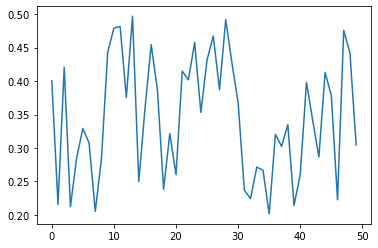

In [26]:
study.trials_dataframe().params_dropout_l0.plot()

In [27]:
study = optuna.create_study(direction="maximize", 
                            sampler=optuna.samplers.CmaEsSampler(), # if not set, TPESampler (single-objective optimization) / NSGAIISampler (multi-objective optimization) as default
                            pruner=optuna.pruners.SuccessiveHalvingPruner()
                            )
study.optimize(objective, n_trials=50, timeout=600)

[I 2022-02-08 17:10:19,942] A new study created in memory with name: no-name-0870977c-4130-402f-8d99-57bba51dc8e3
[I 2022-02-08 17:10:25,073] Trial 0 finished with value: 0.71875 and parameters: {'n_layers': 2, 'n_units_l0': 29, 'dropout_l0': 0.24047582622596916, 'n_units_l1': 28, 'dropout_l1': 0.353207220646377, 'optimizer': 'SGD', 'lr': 0.09933211401398005, 'batch_size': 114}. Best is trial 0 with value: 0.71875.
[W 2022-02-08 17:10:25,080] The parameter 'optimizer' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2022-02-08 17:10:28,911] Trial 1 finished with value: 0.765625 and parameters: {'n_layers': 2, 'n_units_l0': 66, 'dropout_l0': 0.352005943603

In [28]:
print("Best parameters: ", study.best_params)
print("Best metric observed:", study.best_value)

Best parameters:  {'n_layers': 2, 'n_units_l0': 66, 'dropout_l0': 0.34425331707825935, 'n_units_l1': 66, 'dropout_l1': 0.4092212405544029, 'optimizer': 'RMSprop', 'lr': 0.0009691146373233104, 'batch_size': 66}
Best metric observed: 0.8


<AxesSubplot:>

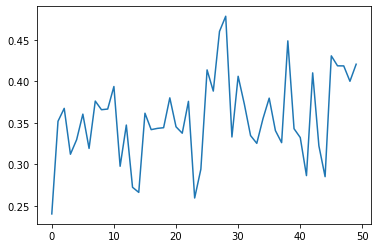

In [29]:
study.trials_dataframe().params_dropout_l0.plot()

## PyTorch Lightning

In [30]:
# !pip install pytorch-lightning 

  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.9.0
    Uninstalling fsspec-0.9.0:
      Successfully uninstalled fsspec-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


In [31]:
import os
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from optuna.integration import PyTorchLightningPruningCallback
from typing import List
from typing import Optional

PERCENT_VALID_EXAMPLES = 0.1
BATCHSIZE = 128
CLASSES = 10
EPOCHS = 10
DIR = os.getcwd()

In [32]:
from torch.utils.data import DataLoader

class Net(nn.Module):
    def __init__(self, dropout: float, output_dims: List[int]):
        super().__init__()
        layers: List[nn.Module] = []

        input_dim: int = 28 * 28
        for output_dim in output_dims:
            layers.append(nn.Linear(input_dim, output_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            input_dim = output_dim

        layers.append(nn.Linear(input_dim, CLASSES))

        self.layers: nn.Module = nn.Sequential(*layers)

    def forward(self, data: torch.Tensor) -> torch.Tensor:
        logits = self.layers(data)
        return F.log_softmax(logits, dim=1)

In [33]:
class LightningNet(pl.LightningModule):
    def __init__(self, dropout: float, output_dims: List[int]):
        super().__init__()
        self.model = Net(dropout, output_dims)

    def forward(self, data: torch.Tensor) -> torch.Tensor:
        return self.model(data.view(-1, 28 * 28))

    def training_step(self, batch, batch_idx: int) -> torch.Tensor:
        data, target = batch
        output = self(data)
        return F.nll_loss(output, target)

    def validation_step(self, batch, batch_idx: int) -> None:
        data, target = batch
        output = self(data)
        pred = output.argmax(dim=1, keepdim=True)
        accuracy = pred.eq(target.view_as(pred)).float().mean()
        self.log("val_acc", accuracy)
        self.log("hp_metric", accuracy, on_step=False, on_epoch=True)

    def configure_optimizers(self) -> optim.Optimizer:
        return optim.Adam(self.model.parameters())

In [34]:
class FashionMNISTDataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str, batch_size: int):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def setup(self, stage: Optional[str] = None) -> None:
        self.mnist_test = datasets.FashionMNIST(
            self.data_dir, train=False, download=True, transform=transforms.ToTensor()
        )
        mnist_full = datasets.FashionMNIST(
            self.data_dir, train=True, download=True, transform=transforms.ToTensor()
        )
        self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

    def train_dataloader(self) -> DataLoader:
        return DataLoader(
            self.mnist_train, batch_size=self.batch_size, shuffle=True, pin_memory=True
        )

    def val_dataloader(self) -> DataLoader:
        return DataLoader(
            self.mnist_val, batch_size=self.batch_size, shuffle=False, pin_memory=True
        )

    def test_dataloader(self) -> DataLoader:
        return DataLoader(
            self.mnist_test, batch_size=self.batch_size, shuffle=False, pin_memory=True
        )

In [35]:
def objective(trial: optuna.trial.Trial) -> float:

    # We optimize the number of layers, hidden units in each layer and dropouts.
    n_layers = trial.suggest_int("n_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    output_dims = [
        trial.suggest_int("n_units_l{}".format(i), 4, 128, log=True) for i in range(n_layers)
    ]

    model = LightningNet(dropout, output_dims)
    datamodule = FashionMNISTDataModule(data_dir=DIR, batch_size=BATCHSIZE)

    trainer = pl.Trainer(
        logger=True,
        limit_val_batches=PERCENT_VALID_EXAMPLES,
        checkpoint_callback=False,
        max_epochs=EPOCHS,
        gpus=1 if torch.cuda.is_available() else None,
        callbacks=[PyTorchLightningPruningCallback(trial, monitor="val_acc")], # Pruning callback
    )
    hyperparameters = dict(n_layers=n_layers, dropout=dropout, output_dims=output_dims)
    trainer.logger.log_hyperparams(hyperparameters)
    trainer.fit(model, datamodule=datamodule)

    return trainer.callback_metrics["val_acc"].item()

In [37]:
study = optuna.create_study(direction="maximize", )
study.optimize(objective, n_trials=100, timeout=600)

[I 2022-02-08 17:13:22,118] A new study created in memory with name: no-name-5e5ed09a-cfab-4ab5-84c2-a0079ebbc9f5
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]


  | Name  | Type | Params
-------------------------------
0 | model | Net  | 6.3 K 
-------------------------------
6.3 K     Trainable params
0         Non-trainable params
6.3 K     Total params
0.025     Total estimated model params size (MB)


Extracting C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\ASUS\Desktop\2021년 스타트업 청년인재 이어드림 프로젝트\수업자료\16 Kaggle\220208_WanDB, Optuna\Optuna 특강\모델_하이퍼파라미터_최적화\FashionMNIST\raw



Validation sanity check: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-02-08 17:16:26,458] Trial 0 finished with value: 0.6640625 and parameters: {'n_layers': 2, 'dropout': 0.41487297353393887, 'n_units_l0': 7, 'n_units_l1': 42}. Best is trial 0 with value: 0.6640625.
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type | Params
-------------------------------
0 | model | Net  | 60.2 K
-------------------------------
60.2 K    Trainable params
0         Non-trainable params
60.2 K    Total params
0.241     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-02-08 17:18:34,561] Trial 1 finished with value: 0.828125 and parameters: {'n_layers': 3, 'dropout': 0.47202799576905397, 'n_units_l0': 68, 'n_units_l1': 69, 'n_units_l2': 26}. Best is trial 1 with value: 0.828125.
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type | Params
-------------------------------
0 | model | Net  | 81.5 K
-------------------------------
81.5 K    Trainable params
0         Non-trainable params
81.5 K    Total params
0.326     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2022-02-08 17:20:37,533] Trial 2 finished with value: 0.787109375 and parameters: {'n_layers': 3, 'dropout': 0.421573412118069, 'n_units_l0': 102, 'n_units_l1': 11, 'n_units_l2': 11}. Best is trial 1 with value: 0.828125.
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type | Params
-------------------------------
0 | model | Net  | 30.4 K
-------------------------------
30.4 K    Trainable params
0         Non-trainable params
30.4 K    Total params
0.121     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\optuna\trial\_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
[I 2022-02-08 17:22:11,675] Trial 3 finished with value: 0.75390625 and parameters: {'n_layers': 3, 'dropout': 0.40722986516921633, 'n_units_l0': 32, 'n_units_l1': 101, 'n_units_l2': 17}. Best is trial 1 with value: 0.828125.
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type | Params
-------------------------------
0 | model | Net  | 95.1 K
------------------------

Validation sanity check: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\pytorch_lightning\trainer\trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
[W 2022-02-08 17:22:16,654] Trial 4 failed because of the following error: KeyError('val_acc')
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-35-7ebe3b86f9e9>", line 25, in objective
    return trainer.callback_metrics["val_acc"].item()
KeyError: 'val_acc'


KeyError: 'val_acc'

In [ ]:
print("Best parameters: ", study.best_params)
print("Best metric observed:", study.best_value)

## 내장 시각화 툴 이용하기

In [38]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [39]:
plot_intermediate_values(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_param_importances(study)

## Wandb 연동

In [ ]:
# !pip install wandb

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
     |████████████████████████████████| 179 kB 56.4 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 133 kB 52.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=bca1e262a581a5eeb9f434f52a8cff6921efb4e00969e359b80098ee4d110542
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=140c5d8e7d4429232a7fbd9a628a2c9b0bf3fb284f6fd0e98dfda8dbdfc78c96
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [40]:
def objective(trial):

    # Generate the model.
    model = Network(trial)
    model.to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Set trial batch size
    BATCHSIZE = trial.suggest_int("batch_size", 4, 128)
    N_TRAIN_EXAMPLES = BATCHSIZE * 30
    N_VALID_EXAMPLES = BATCHSIZE * 10

    # Get the FashionMNIST dataset.
    train_loader, valid_loader = get_mnist(BATCHSIZE)

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        total_preds = []
        total_targets = []
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                total_preds.extend(pred.cpu().numpy().reshape(-1))
                total_targets.extend(target.cpu().numpy().reshape(-1))

        accuracy = accuracy_score(total_targets, total_preds)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
import wandb
from optuna.integration.wandb import WeightsAndBiasesCallback

wandb_kwargs = {"project": "optuna_study_220208",}
wandbc = WeightsAndBiasesCallback(wandb_kwargs=wandb_kwargs, metric_name="accuracy")

study = optuna.create_study(direction="maximize", 
                            sampler=optuna.samplers.CmaEsSampler(), # if not set, TPESampler (single-objective optimization) / NSGAIISampler (multi-objective optimization) as default
                            pruner=optuna.pruners.SuccessiveHalvingPruner()
                            )
study.optimize(objective, n_trials=50, timeout=600, callbacks=[wandbc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ExperimentalWarning:

WeightsAndBiasesCallback is experimental (supported from v2.9.0). The interface can change in the future.



<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


[I 2021-09-10 05:07:24,677] A new study created in memory with name: no-name-04a187be-21b2-45dc-8230-9d0692c35620
[I 2021-09-10 05:07:31,441] Trial 0 finished with value: 0.6875 and parameters: {'n_layers': 1, 'n_units_l0': 16, 'dropout_l0': 0.4408937176050698, 'optimizer': 'Adam', 'lr': 0.00040897524409457713, 'batch_size': 91}. Best is trial 0 with value: 0.6875.
[W 2021-09-10 05:07:31,449] The parameter 'n_units_l1' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2021-09-10 05:07:31,452] The parameter 'dropout_l1' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSa

---

# (실습) CNN 하이퍼 파라미터 튜닝 - PyTorch

- 우리는 위에서 fully connected 구조의 모델로 FashionMnist 분류 문제를 해결하였습니다.
- Conv2d 레이어를 이용하여 CNN 기반 모델을 만들고 레이어 개수나 커널 사이즈, 채널 사이즈등을 자유롭게 튜닝해보며 성능을 높여 봅시다.


In [43]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets
from torchvision import transforms
from sklearn.metrics import accuracy_score

# 시드 고정
def seed_everything(seed=99):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  
seed_everything()

In [44]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CLASSES = 10
EPOCHS = 10
LOG_INTERVAL = 10

print(DEVICE)

def get_mnist(BATCHSIZE):
    # Load FashionMNIST dataset.
    # Optimize batch size
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('./mnist_data', train=True, download=True, transform=transforms.ToTensor()),
        batch_size=BATCHSIZE,
        shuffle=True,
    )
    valid_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('./mnist_data', train=False, transform=transforms.ToTensor()),
        batch_size=32,
        shuffle=True,
    )

    return train_loader, valid_loader

cpu


In [115]:
class ConvNetwork(nn.Module):
    def __init__(self, trial):
        super(Network, self).__init__()

        ########### TODO ############
        # DEFINE YOUR OWN NETWORK   #
        # FINE TUNE HYPER PARAMS    #
        # EX) CHANNEL & KERNEL SIZE #
        # EX) & NUM CNN LAYERS ..   #
        #############################
        
        n_layers = trial.suggest_int("n_layers", 1, 3)
        layers = []
        
        for i in range(n_layers):
            out_features = trial.suggest_int("n_units_l{}".format(i), in_features, 1)
            layers.append(nn.Linear(out_features, out_features))
            layers.append(nn.ReLU())
            
            p = trial.suggest_float("dropout_l{}".format(i), 0, 0.5)
            layers.append(nn.Dropout(p))
            
            in_features = out_features
            
        layers.append(nn.Linear(in_features, CLASSES))
        layers.append(nn.LogSoftmax(dim=1))
        
        self.layers = nn.Sequential(*layers)
        
        
#         conv1 = int(((in_features - 2)) / 64)
#         conv2 = int((conv2 - 2) / 64)
#         self.n_conv = int(conv2 * 16)
        
#         num_filters1 = trial.suggest_int("num_filters1", 16, 64, step=16)
#         num_filters2 = trial.suggest_int("num_filters2", 16, 64, step=16)
        
#         kernel_size = trial.suggest_int('kernel_size', 2, 7)
#         self.conv1 = nn.Conv1d(1, num_filters1, kernel_size, 1)
#         self.conv1_bn = nn.BatchNorm1d(num_filters1)
# #         self.conv2 = nn.Conv1d(num_filters1, num_filters2, kernel_size, 1)
# #         self.conv2_bn = nn.BatchNorm1d(num_filters2)
        
#         self.dp = nn.Dropout(trial.suggest_uniform('dropout_rate', 0, 1.0))
#         self.fc3 = nn.Linear(self.n_conv, 2)
        

    def forward(self, x):
        return self.layers(x)

In [109]:
def objective(trial):

    # Generate the model.
    model = Network(trial)
    model.to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Set trial batch size
    BATCHSIZE = trial.suggest_int("batch_size", 4, 128)
    N_TRAIN_EXAMPLES = BATCHSIZE * 30
    N_VALID_EXAMPLES = BATCHSIZE * 10

    # Get the FashionMNIST dataset.
    train_loader, valid_loader = get_mnist(BATCHSIZE)

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        total_preds = []
        total_targets = []
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                total_preds.extend(pred.cpu().numpy().reshape(-1))
                total_targets.extend(target.cpu().numpy().reshape(-1))

        accuracy = accuracy_score(total_targets, total_preds)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [116]:
study = optuna.create_study(direction="maximize", 
                            ###### TODO ######
                            # CHOOSE SAMPLER #
                            # CHOOSE PRUNER  #
                            
                            sampler=optuna.samplers.CmaEsSampler(), 
                            pruner=optuna.pruners.SuccessiveHalvingPruner()
                            )
study.optimize(objective, n_trials=50, timeout=600)

[I 2022-02-08 22:33:23,627] A new study created in memory with name: no-name-0ca5ad36-3bd5-4561-a0d5-490aaabceb3e
[W 2022-02-08 22:33:23,695] Trial 0 failed because of the following error: RuntimeError('mat1 and mat2 shapes cannot be multiplied (2464x28 and 784x10)')
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-109-ef95c349dab5>", line 31, in objective
    output = model(data)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "<ipython-input-21-2a9c448fbcf6>", line 24, in forward
    return self.layers(x)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\container.py", line 141,

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2464x28 and 784x10)